In [1]:
#1 ) Pandas read in CSV file
import pandas as pandas
import numpy as np
import somoclu #Self organizing map on a cluster
import matplotlib.pyplot as plt

#! pwd #Prints working directory
directory = ''
filename = 'numbers.csv'
seperator = ','
header_row_number = None
label_column_number = 0;

dataframe = pandas.read_csv(directory + filename,
                            sep=seperator,
                            header=header_row_number,
                            index_col=label_column_number)

In [2]:
#2 ) Organize dataset

# Drops column if all rows have NA for this column
dataframe = dataframe.dropna(1,'all')
labels = dataframe.index.astype(str);
data = dataframe.to_numpy()

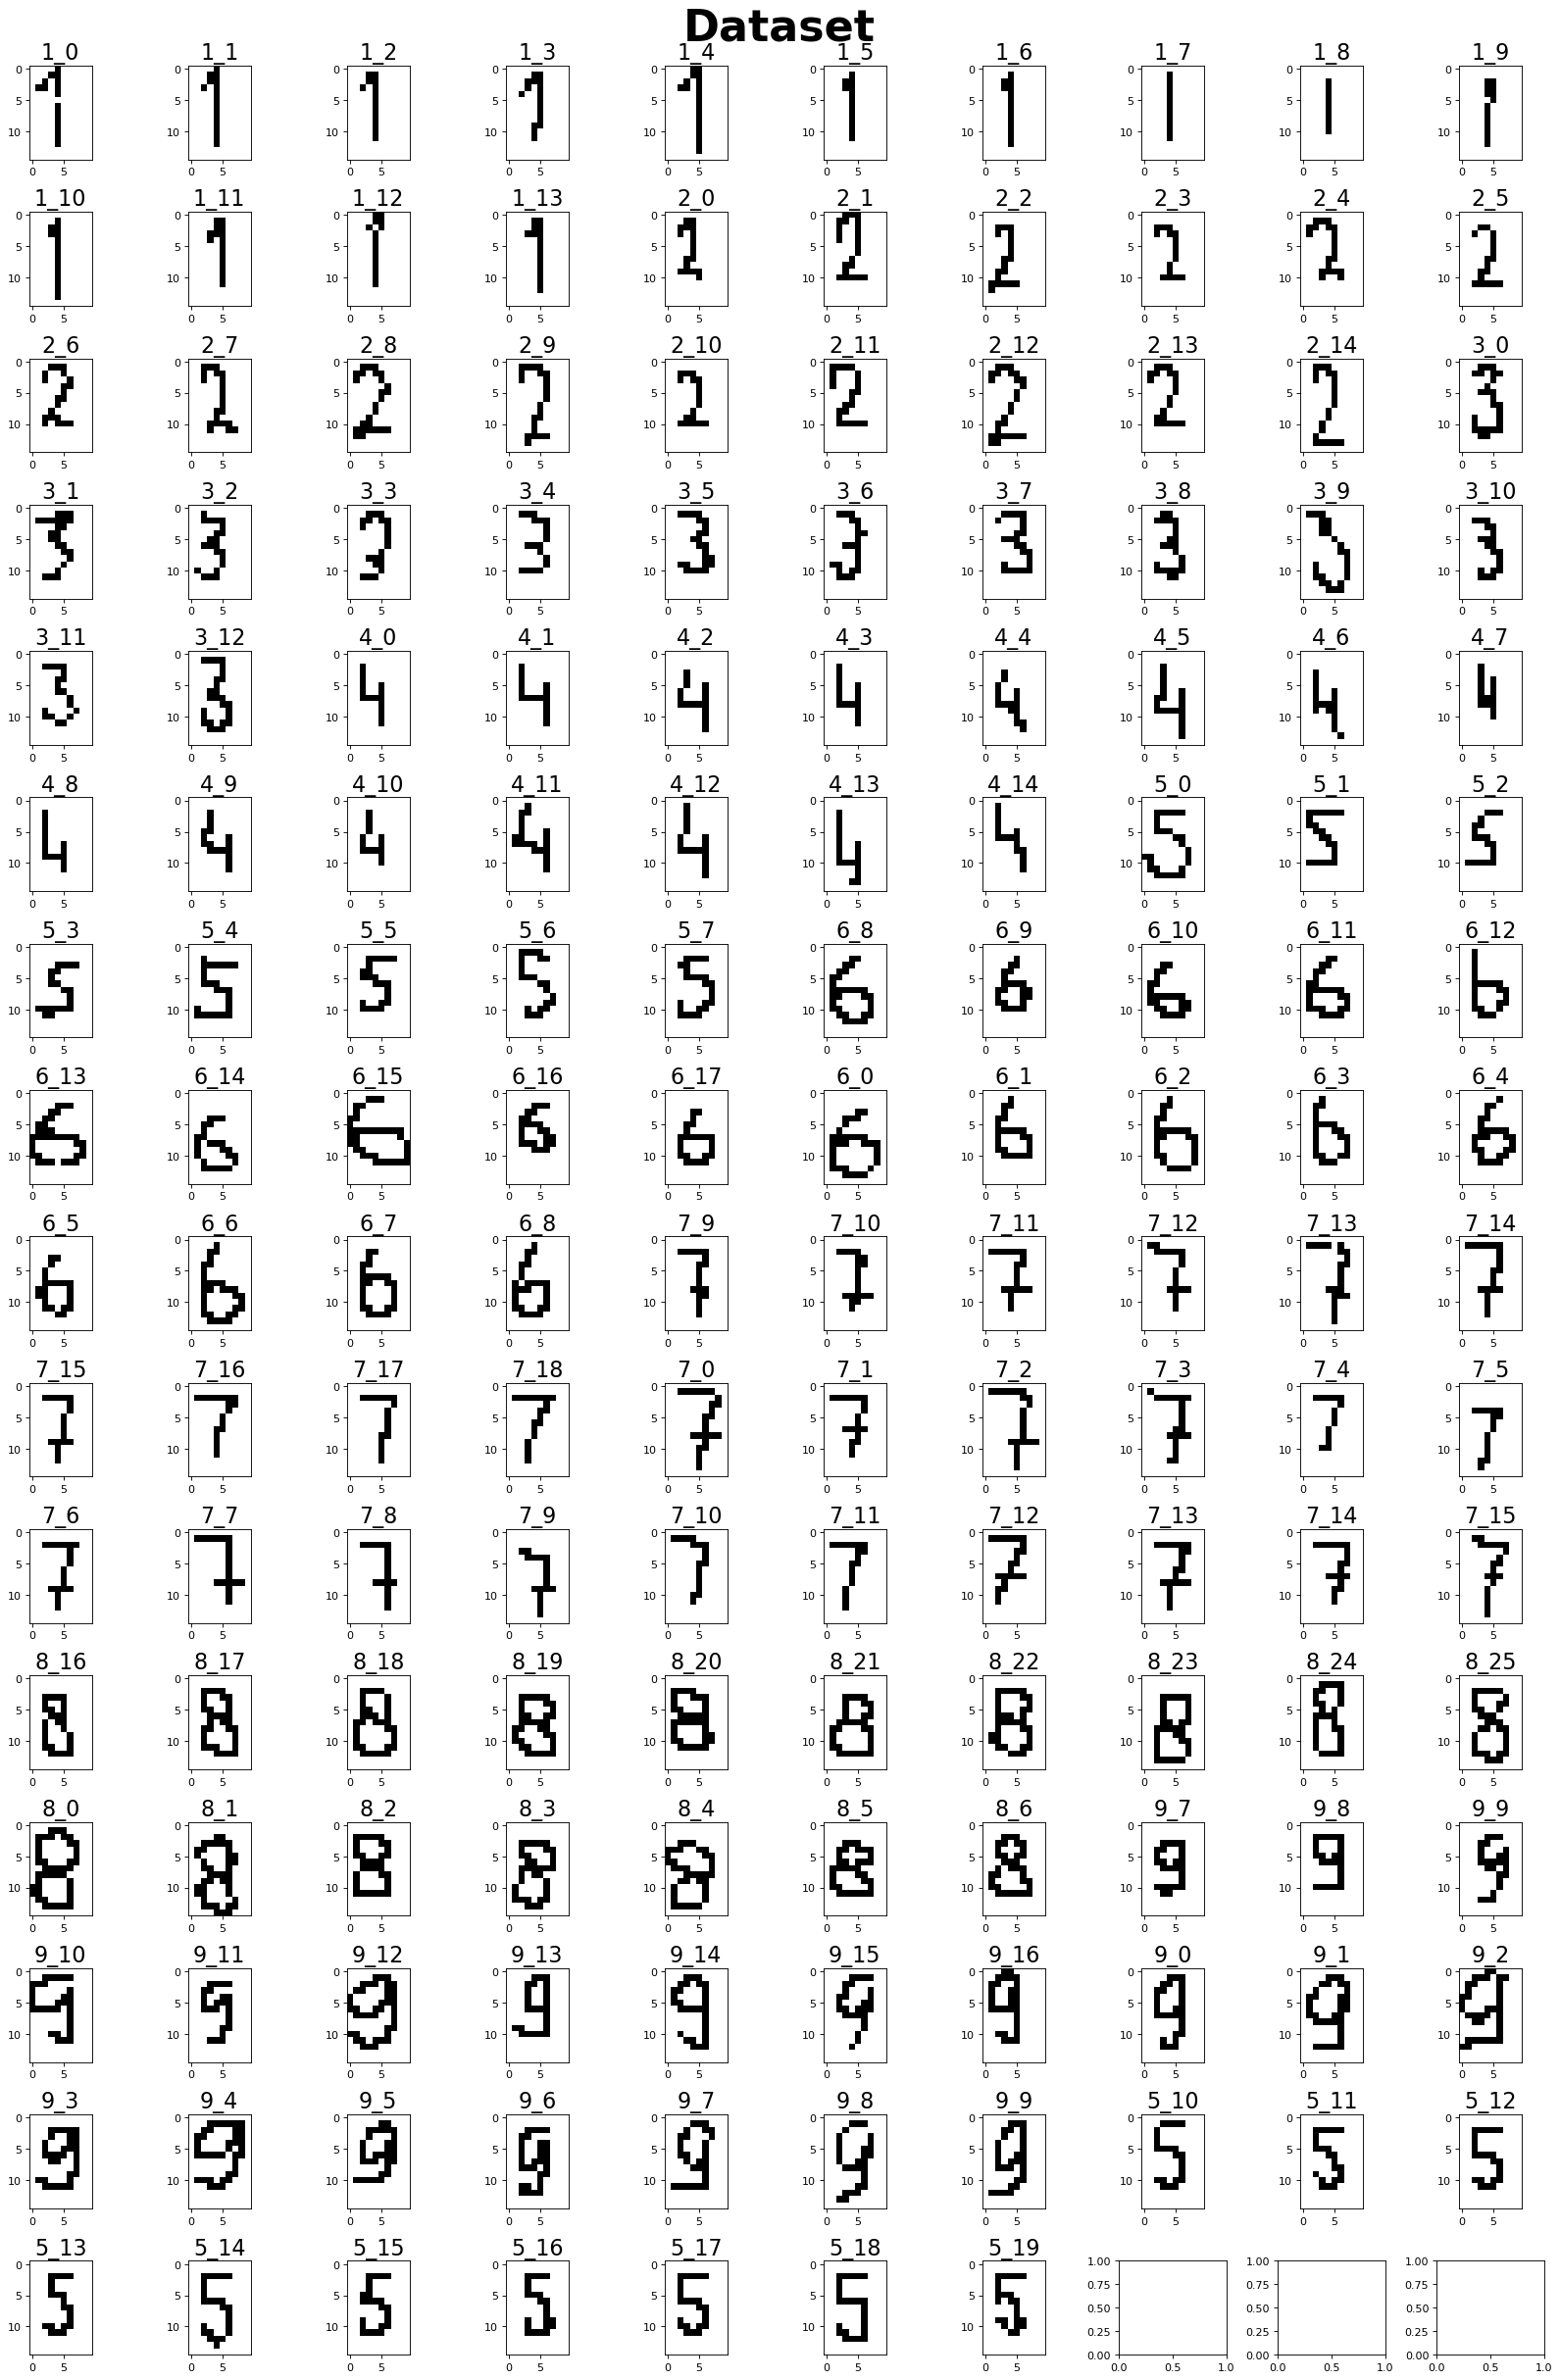

In [3]:
fig, axs = plt.subplots(nrows=16,
                        ncols=10,
                        #sharex=True,
                        #sharey=True,
                        figsize=(20, 30),
                        dpi=80)

for ax, row, label in zip(axs.flat, data, labels):
    reshaped_row = row.reshape(15,10)#TODO: Make this configurable
    #ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation='gaussian')
    ax.imshow(reshaped_row, cmap=plt.cm.binary, interpolation=None)
    ax.set_title(str(label), fontsize=20)
    firstTime=False

plt.suptitle('Dataset', fontsize=40, weight='bold', x=0.5, y=1.01)
plt.tight_layout(pad=1)
plt.show()

In [106]:
import math

number_of_columns = 100
number_of_rows = 100

som = somoclu.Somoclu(number_of_columns, number_of_rows, maptype='planar', kerneltype=0, verbose=2)

#print("Suggested size of map = ", 5 * math.sqrt(data.size))
#som.view_activation_map()
#som.view_component_planes()
#som.view_similarity_matrix()
#som.view_umatrix()

In [107]:
%time som.train(np.float32(data), epochs=10, scale0=1, scaleN=0.1)

CPU times: user 10.1 s, sys: 360 ms, total: 10.5 s
Wall time: 5.78 s


In [108]:
def getColors():
    colors = list()

    for label in labels:
        colors.append(int(label[0]))
    return colors

<IPython.core.display.Javascript object>


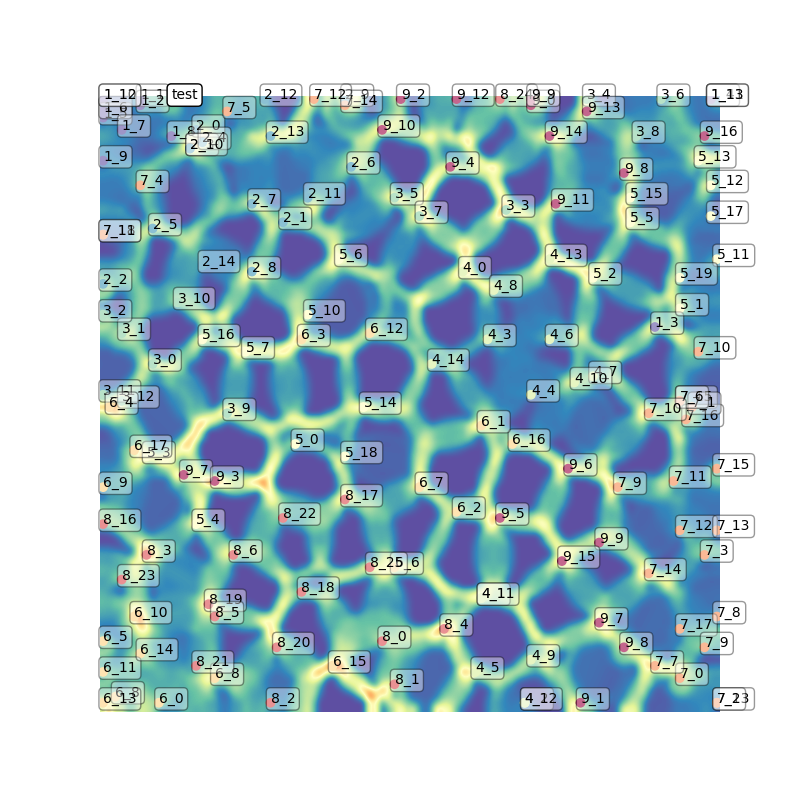

6

In [158]:
%matplotlib notebook

# Unified distance matrix
som.view_umatrix(bestmatches=True, bestmatchcolors=getColors(),  filename="output.svg") #labels=labels,

def testMethod():
    for bmu in getBmuIndexes():
        print(bmu.tolist()[0])
        print("Next")

def press(event):
    setAnnotationsVisible(True)
    for bmu in getBmuIndexes():
        
        plt.gca().annotate("test", xy=bmu, bbox=dict(boxstyle="round", fc="w"))
        
        if int(x) == bmu.tolist()[0]:
            setAnnotationsVisible(False)
    #if event.inaxes == bmu:
    #plt.gcf().canvas.draw_idle()
    #print(event.inaxes)
    #annotation.set_visible(True)
    #annotation.set_text(event.inaxes)
annotations=list()

def drawAnnotations():
    i = 0
    for bmu in getBmuIndexes():
        annotation = plt.gca().annotate(labels[i], xy=bmu, bbox=dict(boxstyle="round", fc="w"))
        annotation.get_bbox_patch().set_alpha(0.4)
        annotations.append(annotation)
        i+=1

def getBmuIndexes():
    return som.get_bmus(som.get_surface_state());
        
def setAnnotationsVisible(isVisible):
    for annotation in annotations:
        annotation.set_visible(isVisible)
        
def getActivationMap(index):
    return som.view_activation_map(data_index=index)#, colormap='Greys')

drawAnnotations()
setAnnotationsVisible(True)

plt.gcf().canvas.mpl_connect("button_press_event", press)